## 下面是一个简单的网络的构成

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.Size([100, 1])


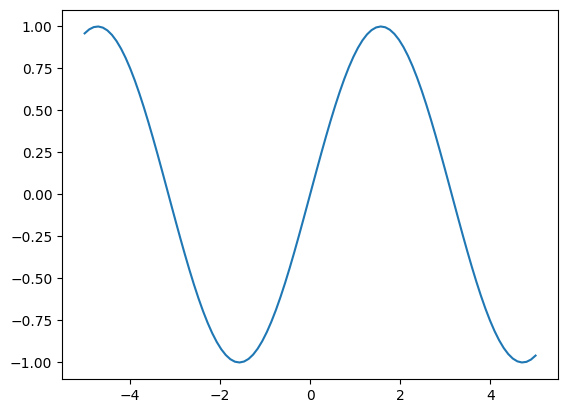

In [2]:
x = torch.linspace(-5,5,100).view(100,1)
print(x.shape)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()
plt.plot(x,y_target)


In [16]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size,32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32,output_size)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
net = Net(input_size = 1, output_size =1)
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [18]:
y = net(x)
print(y.shape)

torch.Size([100, 1])


(-1.0, 1.0)

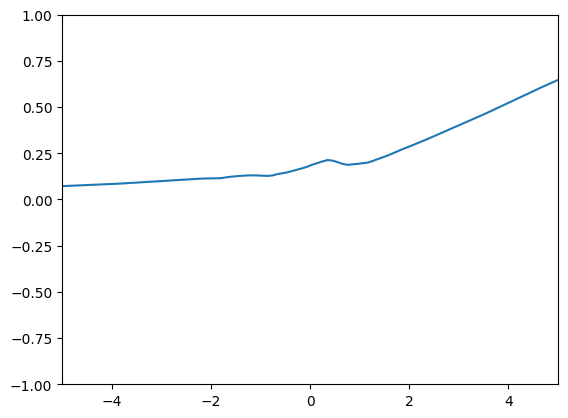

In [19]:
x_plot = x.detach().numpy()
y_plot = y.detach().numpy()

plt.plot(x_plot,y_plot)

plt.xlim(-5,5)
plt.ylim(-1,1)


### 看参数规格

In [20]:
for name,p in net.named_parameters():
    print(name, p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


fc1.weight torch.Size([32, 1])
输出维度在前面  y = x * W转 + b

fc1.bias torch.Size([32])
线性偏置大小对应输出的维度

In [21]:
print(net.fc1.bias.grad)

None


In [23]:
loss = ((y - y_target)**2).sum()
loss.backward()

In [24]:
for p in net.parameters():
    p.data.add_(-0.01 * p.grad) #就地修改
    p.grad.data.zero_() #梯度清零

In [ ]:
for _ in range(100):
    y = net(x) #前向传播
    loss = ((y - y_target)**2).sum() #计算损失
    loss.backward() #反向传播 计算每个参数，对此错误负多大责任
    for p in net.parameters(): # 改正参数
        p.data.add_(- 0.001 * p.grad)
        p.grad.data.zero_()

(-1.0, 1.0)

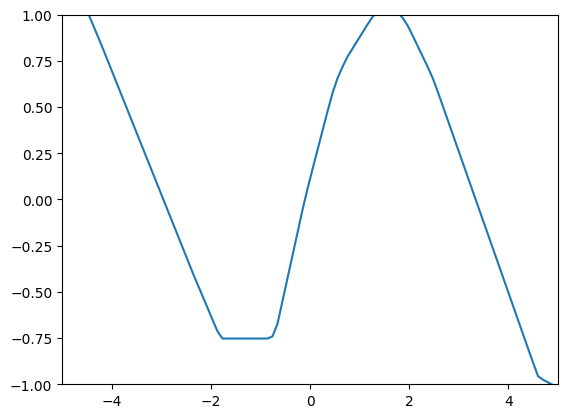

In [27]:
x_plot = x.detach().numpy()
y_plot = y.detach().numpy()

plt.plot(x_plot,y_plot)

plt.xlim(-5,5)
plt.ylim(-1,1)



In [28]:
loss_fn = nn.MSELoss()
loss_fn(torch.Tensor([1.4,3.3,1.9]),torch.Tensor([1,3,2]))


tensor(0.0867)

In [29]:
net = Net(input_size = 1, output_size =1)

for _ in range(1000):
    y = net(x)
    loss = loss_fn(y,y_target)
    loss.backward()
    for p in net.parameters():
        p.data.add_( - 0.001 * p.grad)
        p.grad.data.zero_()
        

(-1.0, 1.0)

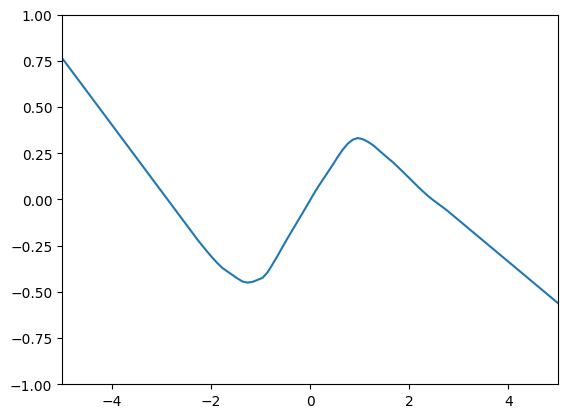

In [30]:
x_plot = x.detach().numpy()
y_plot = y.detach().numpy()

plt.plot(x_plot,y_plot)

plt.xlim(-5,5)
plt.ylim(-1,1)



In [32]:
from torch import optim 

net = Net(input_size=1,output_size=1)
optimizer = optim.Adam(net.parameters() , lr = 1e-3)

x = torch.linspace(-5 , 5 , 100).view(-1 , 1)
# (-1,1) 行数自动计算 列数固定为1
y = net(x)
y_target = torch.sin(x)

loss_fn = nn.MSELoss()

(-1.0, 1.0)

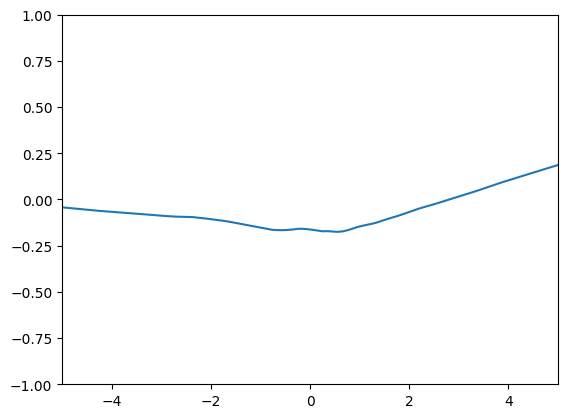

In [33]:
x_plot = x.detach().numpy()
y_plot = y.detach().numpy()

plt.plot(x_plot,y_plot)

plt.xlim(-5,5)
plt.ylim(-1,1)



In [36]:
for _ in range(100):
    y = net(x)
    loss = loss_fn(y , y_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


(-1.0, 1.0)

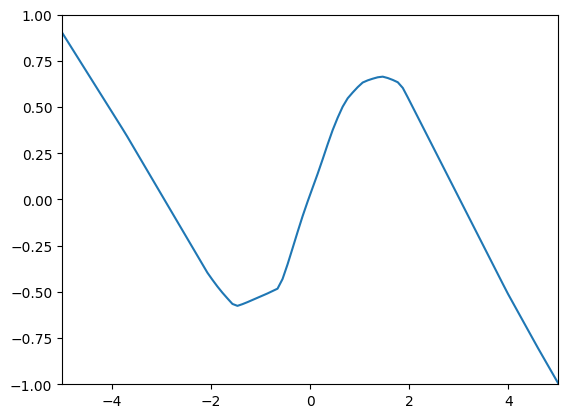

In [37]:
x_plot = x.detach().numpy()
y_plot = y.detach().numpy()

plt.plot(x_plot,y_plot)

plt.xlim(-5,5)
plt.ylim(-1,1)



In [38]:
print(torch.cuda.is_available())

True


In [40]:
device = torch.device("cuda")
y = torch.ones((2,3),device=device)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [41]:
device = torch.device("cuda")
x = torch.zeros((2,3))
y = torch.ones((2,3),device = device)
z = x + y 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [42]:
x = x.to(device)
z = x + y
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [43]:
z.numpy()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [44]:
z_cpu = z.to('cpu')
z_cpu.numpy()


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Using device: cuda


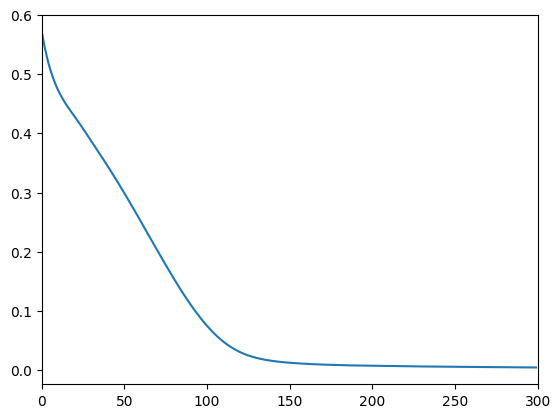

In [46]:
#define the data
x = torch.linspace(-5,5,100).view(-1,1)
y_target = torch.sin(x)
net = Net(input_size =1 , output_size =1)

###   NET   ###
#set up GPU device (if available ) and move models and targets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:" , device)

net = net.to(device)
y_target = y_target.to(device)

###   NET   ###
optimizer = optim.Adam(net.parameters() , lr = 1e-3)
loss_fn = nn.MSELoss()
losses = []

for _ in range(300):
    x = x.to(device)

    y = net(x)
    loss = loss_fn(y,y_target)
    losses.append(loss.detach().cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(300),losses)
plt.xlim(0,300)
plt.show()

模型在evaluation mode就不会给你inconsistent result(不一致的结果)
不在train 环节了，关掉dropout 和 BN (batch norm)

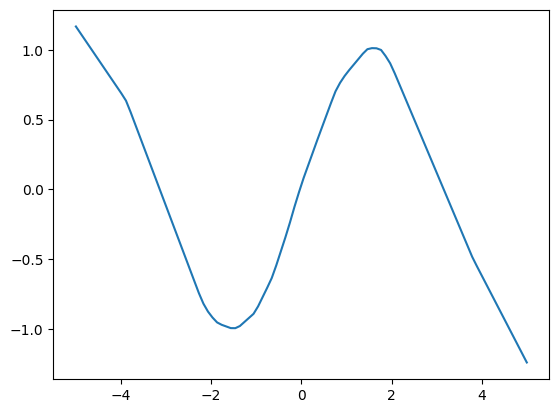

In [ ]:
net.eval()

with torch.no_grad(): # 告诉pytorch在这部分不需要梯度了
    y = net(x)

plt.plot(x.cpu().numpy() , y.cpu().numpy() ) #x.cpu()先转到cpu.numpy()再呼叫numpy将其转为numpy arrays


In [48]:
#save a dictionary of parameter names and their values

PATH = "checkpoint.pt"
torch.save(net.state_dict() ,PATH)#state_dict不光有parameters，还包括batchnorm的选择等

In [ ]:
#later : initialize a new model and load the saved state dict

new_model = Net(input_size = 1 ,output_size =1)
new_model.to(device)
new_model.load_state_dict(torch.load(PATH))
new_model.eval()

for (name1,val1),(name2,val2) in zip(net.state_dict().items() ,new_model.state_dict().items()):
    assert name1 == name2 and torch.equal(val1,val2),f"{name1} and {name2} states differ!"


python assert 用于debug
assert [判断条件]，[报错信息]
